### Imports

In [1]:
import os
import re
# import PyPDF2
import pdfplumber
import pandas as pd
import numpy as np

### Function to extract text from PDFs 

In [2]:
# Define a function to extract information from a PDF
def extract_information(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        resume_text = ""
        for page in pdf.pages:
            resume_text = " ".join([resume_text, page.extract_text()])
    resume_text = resume_text.strip()
    return resume_text

### Defining Regex to extract Skills & Education from extracted resume text

In [3]:
# Define a function to extract Skills, and Education
def extract_details(resume_text):
    # Define regular expressions to extract Skills & Education
    skills_pattern = r'Skills\n([\s\S]*?)(?=\n[A-Z]|$)' 
    education_pattern = r'Education\n([\s\S]*?)(?=\n[A-Z][a-z]*\n|$)'
    
    # Get Skills & Education
    skills_match = re.findall(skills_pattern, resume_text, re.DOTALL)
    education_match = re.findall(education_pattern, resume_text, re.DOTALL)
    
    # Skills & Education
    if len(skills_match)!=0:
        skills = skills_match[0]
    else:
        skills_pattern = r'skills\n((?:.*)*)' 
        skills_match = re.findall(skills_pattern, resume_text, re.DOTALL)
        if len(skills_match)!=0:
            skills = skills_match[0]
        else:
            skills = None
            
    if len(education_match)!=0:
        education = education_match[0]
    else:
        education = None
    
    return {
        'Skills': skills,
        'Education': education
    }

### Extracting CVs

In [12]:
%%time

data_folder = 'data'
resume_data = []

# Iterate through sub-folders and PDF files
for category_folder in os.listdir(data_folder):
    category_path = os.path.join(data_folder, category_folder)
    if os.path.isdir(category_path):
        for pdf_file in os.listdir(category_path):
            if pdf_file.endswith('.pdf'):
                pdf_path = os.path.join(category_path, pdf_file)
                # print(pdf_path)
                text = extract_information(pdf_path)
                details = extract_details(text)
                
                # Adding Category & ID
                details['ID'] = pdf_file.replace('.pdf', '')
                details['Category'] = category_folder
                
                # print(f'File: [{pdf_path}]')
                # print(details, end='\n\n')
                resume_data.append(details)
                
print('PDF Extraction Done!')

PDF Extraction Done!
CPU times: total: 25min 45s
Wall time: 26min 29s


In [13]:
resume_df = pd.DataFrame(resume_data)
resume_df.to_csv('./pdf_extracted_skills_education.csv', index=False)

In [14]:
resume_df.shape

(2484, 4)

### Analyzing Null Values

In [4]:
# Null values
df.isna().sum()

# It seems that Education was not extracted properly

Skills        91
Education    590
ID             0
Category       0
dtype: int64

In [6]:
# We have 15 Resumes where Skills & Education were not extracted
# So, let's remove them

print(df[(df.Skills.isna() & df.Education.isna())])

     Skills Education        ID                Category
145     NaN       NaN  17021141                ADVOCATE
367     NaN       NaN  31225895                 APPAREL
407     NaN       NaN  14248724                    ARTS
802     NaN       NaN  12632728    BUSINESS-DEVELOPMENT
1047    NaN       NaN  14849103            CONSTRUCTION
1270    NaN       NaN  14014749                DESIGNER
1357    NaN       NaN  90066849                DESIGNER
1492    NaN       NaN  20566550             ENGINEERING
1723    NaN       NaN  17576030                 FITNESS
1738    NaN       NaN  21178545                 FITNESS
1802    NaN       NaN  77266989                 FITNESS
1829    NaN       NaN  15499825              HEALTHCARE
2078    NaN       NaN  20237244  INFORMATION-TECHNOLOGY
2116    NaN       NaN  29051656  INFORMATION-TECHNOLOGY
2290    NaN       NaN  16280971                   SALES


In [9]:
# We are left with 2469 resumes after removing those 15 resumes with null data in both of them

print(df[~(df['Skills'].isna() & df['Education'].isna())].shape)

cv_df = df[~(df['Skills'].isna() & df['Education'].isna())].reset_index(drop=True)
cv_df.head()

(2469, 4)


,Skills,Education,ID,Category
0,Accounting; General Accounting; Accounts Payab...,Northern Maine Community College 1994 Associat...,10554236,ACCOUNTANT
1,"accounting, accounts payable, Accounts Receiva...","Bachelor of Science : Accounting , May 2010 Un...",10674770,ACCOUNTANT
2,"accounts payables, accounts receivables, Accou...",Computer Applications Specialist Certificate P...,11163645,ACCOUNTANT
3,"accounting, balance sheet, budgets, client, cl...","EMORY UNIVERSITY, Goizueta Business School 5 2...",11759079,ACCOUNTANT
4,Aderant/CMS Financial reporting,Bachelor of Business Administration : Accounti...,12065211,ACCOUNTANT


In [26]:
# New number of null values in Skills & Education Section
cv_df.isna().sum()

Skills        76
Education    575
ID             0
Category       0
dtype: int64

In [10]:
# Null values in Skills Section
cv_df[cv_df.Skills.isna()]

,Skills,Education,ID,Category
7,NaN,"Bachelor of Science , Accounting Strayer Unive...",12442909,ACCOUNTANT
23,NaN,University of Phoenix Masters of Business Admi...,15363277,ACCOUNTANT
46,NaN,"Masters , Accounting University of Florida ï¼​...",21794875,ACCOUNTANT
76,NaN,High School Diploma : Business Management/Acco...,27637576,ACCOUNTANT
115,NaN,Bachelor of Arts : Economics City College of N...,82649935,ACCOUNTANT
...,...,...,...,...
2242,NaN,Master of Journalism : PR/Integrated Communica...,59346975,PUBLIC-RELATIONS
2245,NaN,B.A : Marketing June 2005 Berkeley College Mar...,75329822,PUBLIC-RELATIONS
2387,NaN,Plans.\nApplied progressive teaching principle...,17481570,TEACHER
2417,NaN,"Ph.D. : Philosophy in Education , 2019\nNorthc...",27126818,TEACHER


In [11]:
# Null values in Education Section
cv_df[cv_df.Education.isna()]

,Skills,Education,ID,Category
11,Budget forecasting expertise General ledger ac...,NaN,13130984,ACCOUNTANT
13,Full Accounting cycle Auditing,NaN,13491889,ACCOUNTANT
20,"account reconciliations, Accounting, accruals,...",NaN,14491649,ACCOUNTANT
29,"Accounting, billing, Change Management, contra...",NaN,17407184,ACCOUNTANT
31,Analytical reasoning Effective time management,NaN,18132924,ACCOUNTANT
...,...,...,...,...
2442,"Anatomy, Arts, EMR software, front office, inj...",NaN,37402097,TEACHER
2446,Behavior modeling Troubleshooting,NaN,45987048,TEACHER
2453,"Computer literate, drivers, listening, natural...",NaN,58708773,TEACHER
2458,â€¢ Well versed with the standards of hygiene ...,NaN,69005326,TEACHER


### Distribution of Different Resumes

In [15]:
cv_df.Category.value_counts()

Category
BUSINESS-DEVELOPMENT      119
ACCOUNTANT                118
INFORMATION-TECHNOLOGY    118
FINANCE                   118
CHEF                      118
ENGINEERING               117
AVIATION                  117
ADVOCATE                  117
SALES                     115
CONSULTANT                115
BANKING                   115
FITNESS                   114
HEALTHCARE                114
CONSTRUCTION              111
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  105
ARTS                      102
TEACHER                   102
DIGITAL-MEDIA              96
APPAREL                    96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

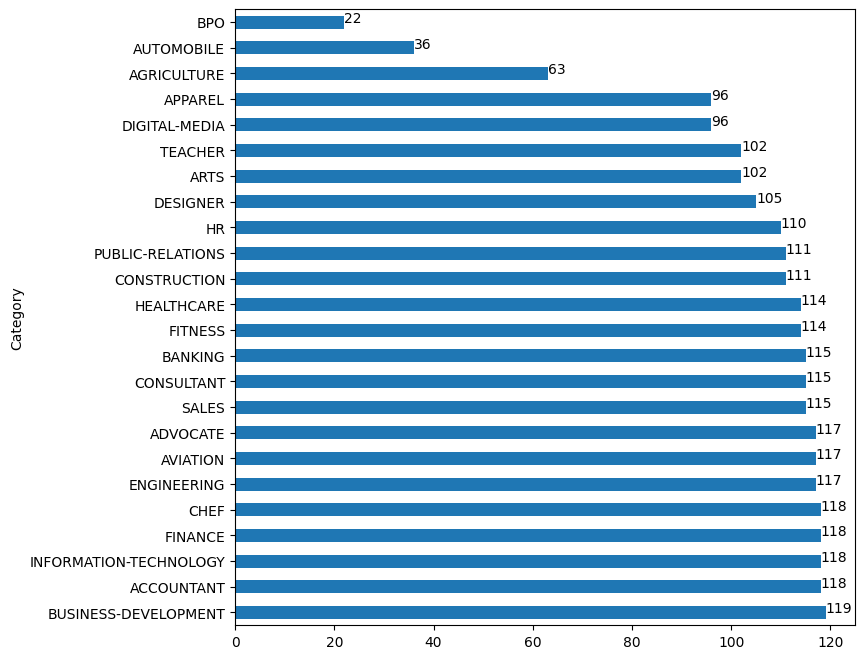

In [24]:
# We can see here the distribution of different CV categories

plt.figure(figsize=(8,8))

cv_df.Category.value_counts().plot(kind='barh')

for index, value in enumerate(cv_df.Category.value_counts().values):
    plt.text(value, index, str(value))
    
plt.show();

Skills        76
Education    575
ID             0
Category       0
dtype: int64